In [1]:
import numpy as np
from mscs_boost import BootBagRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# Some training and testing data that is easy to visualize

In [2]:
train_x = np.linspace(0, 4*np.pi, 100).reshape(100,1)
train_y = np.sin(train_x).reshape(100,)
test_x = np.linspace(0, 4*np.pi, 49).reshape(49,1) # 49 and 100 are relatively prime
test_y = np.sin(test_x).reshape(49,)

# Let's fit a BootBag ensemble of linear models to this data.

In [3]:
from sklearn.linear_model import LinearRegression
linbag = BootBagRegressor(LinearRegression,
                          num_bootstraps=5,
                          bootstrap_size=20,
                          rand_seed=2018,
                           model_args={'fit_intercept':True})
linbag.fit(train_x,train_y)
linbag.score(test_x, test_y)

0.13480092090972584

# Obviously, the average of linear models is just a linear model, so this is not very good.  Let's see a picture.

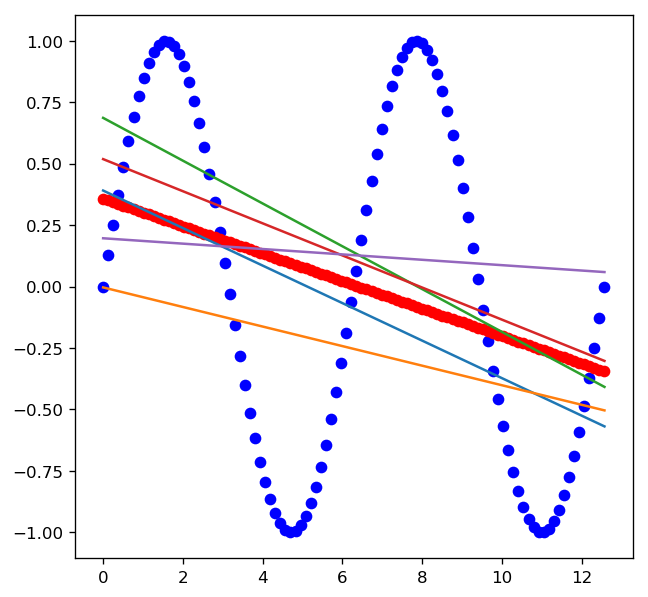

In [4]:
ax,fig = plt.subplots(figsize=(6,6), dpi=120)
fig.scatter(train_x, train_y, color='blue')
fig.scatter(train_x, linbag.predict(train_x), color='red')
for lin in linbag._bootstrap_models:
    fig.plot(train_x, lin.predict(train_x))

plt.show(fig)

# Now, let's apply a BootBag ensemble of trees to the same problem.

In [5]:
from sklearn.tree import DecisionTreeRegressor
treebag = BootBagRegressor(DecisionTreeRegressor,
                          num_bootstraps=5,
                          bootstrap_size=20,
                          rand_seed=2018,
                          model_args={'max_depth': 3, 'random_state': 2019})
treebag.fit(train_x,train_y)
treebag.score(test_x, test_y)

0.8648216860785694

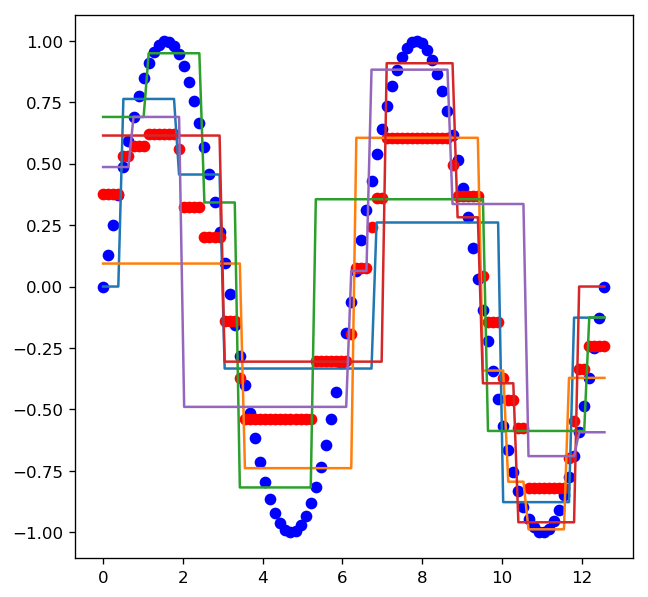

In [6]:
ax,fig = plt.subplots(figsize=(6,6), dpi=120)
fig.scatter(train_x, train_y, color='blue')
fig.scatter(train_x, treebag.predict(train_x), color='red')
for t in treebag._bootstrap_models:
    fig.plot(train_x, t.predict(train_x))

plt.show(fig)